# Synthetic Data Validation
- This notebook demonstrates the synthetic data generator and validates that generated data maintains the statistical properties of the original dataset.

In [2]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from generate_synthetic_data import SegmentedTelcoGenerator

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### Generate Synthetic Data


In [3]:
generator = SegmentedTelcoGenerator('../data/raw/Telco_customer_churn.xlsx', n_segments=4)

Loading reference data and identifying 4 customer segments...

Segment Analysis:

Segment 0 (n=1808):
  Churn Rate: 4.4%
  Avg Tenure: 56.3 months
  Month-to-month: 9.1%

Segment 1 (n=1420):
  Churn Rate: 3.1%
  Avg Tenure: 42.3 months
  Month-to-month: 0.4%

Segment 2 (n=1716):
  Churn Rate: 29.1%
  Avg Tenure: 12.8 months
  Month-to-month: 99.6%

Segment 3 (n=2099):
  Churn Rate: 59.4%
  Avg Tenure: 21.0 months
  Month-to-month: 95.1%
Identified and learned 4 customer segments



In [4]:
synthetic_df = generator.generate(n_samples=1000)


Generating 1000 synthetic customers from 4 segments...

Generating from segments: [258 201 243 298]

Generated 1000 synthetic customers

Synthetic Data Segment Characteristics:
Segment 0: Churn Rate = 14.7%
Segment 1: Churn Rate = 26.1%
Segment 2: Churn Rate = 37.9%
Segment 3: Churn Rate = 36.4%


In [5]:
synthetic_df.head(10)

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,SYNTH-000001,Male,No,Yes,No,62,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),102.32,6870.70,0
1,SYNTH-000002,Female,Yes,Yes,Yes,52,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),81.32,4284.22,1
2,SYNTH-000003,Male,No,Yes,Yes,54,Yes,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),63.41,3576.02,0
3,SYNTH-000004,Male,No,No,No,58,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,No,Mailed check,97.99,6113.15,0
4,SYNTH-000005,Male,No,Yes,No,72,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),68.93,4577.87,0
5,SYNTH-000006,Male,No,Yes,Yes,64,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),47.29,3138.00,0
6,SYNTH-000007,Female,Yes,No,Yes,61,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),82.91,4949.52,0
7,SYNTH-000008,Male,No,Yes,No,58,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Two year,Yes,Credit card (automatic),40.38,2264.43,0
8,SYNTH-000009,Male,No,Yes,No,69,Yes,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),92.17,6245.20,0
9,SYNTH-000010,Male,No,No,No,49,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),77.04,4046.46,0


### Load Original Data For Comparison

In [6]:
original_df = pd.read_excel('../data/raw/Telco_customer_churn.xlsx', sheet_name='Telco_Churn')
print(f"Original data: {len(original_df)} customers")
print(f"Synthetic data: {len(synthetic_df)} customers")

Original data: 7043 customers
Synthetic data: 1000 customers


### Visual Comparison: Numeric Features 

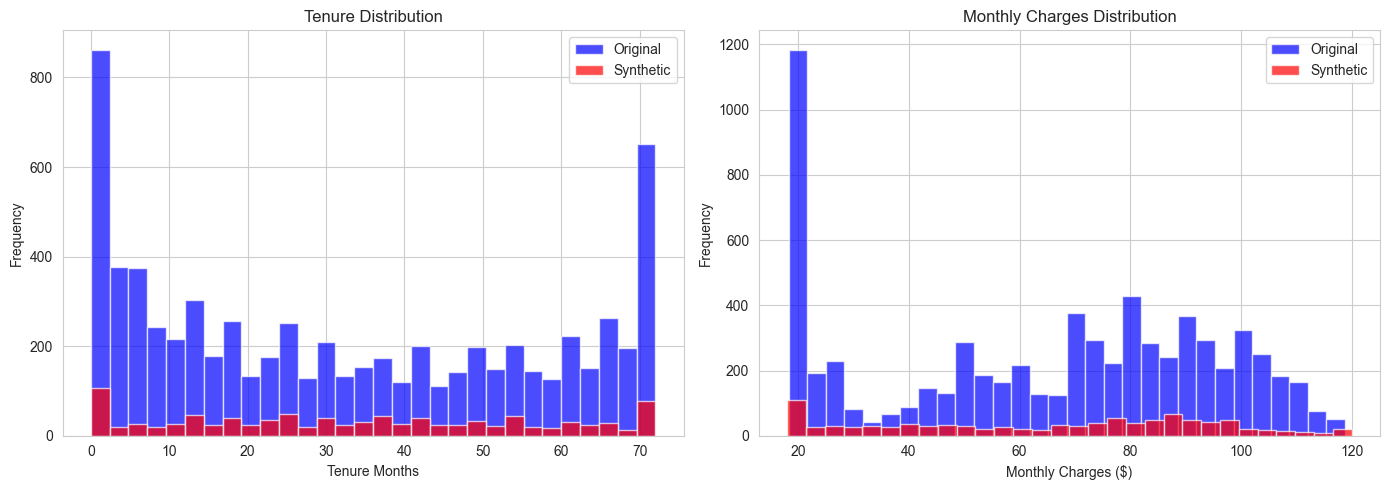

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(original_df['Tenure Months'], bins=30, alpha=0.7, color='blue', label='Original')
axes[0].hist(synthetic_df['Tenure Months'], bins=30, alpha=0.7, color='red', label='Synthetic')
axes[0].set_xlabel('Tenure Months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Tenure Distribution')
axes[0].legend()

axes[1].hist(original_df['Monthly Charges'], bins=30, alpha=0.7, color='blue', label='Original')
axes[1].hist(synthetic_df['Monthly Charges'], bins=30, alpha=0.7, color='red', label='Synthetic')
axes[1].set_xlabel('Monthly Charges ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Monthly Charges Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

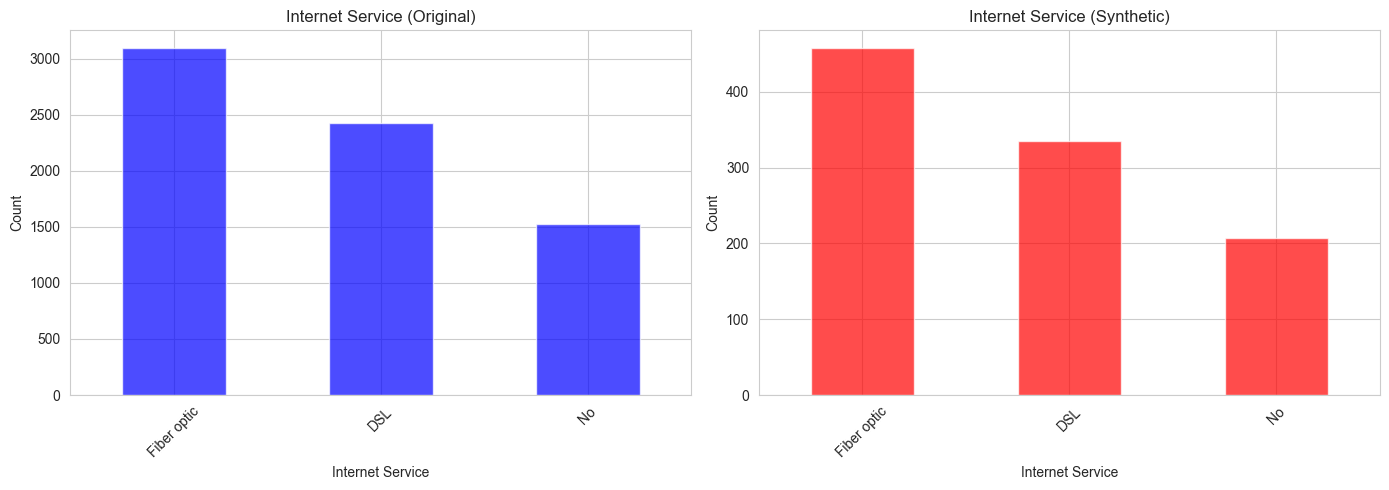

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

original_df['Internet Service'].value_counts().plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Internet Service (Original)')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

synthetic_df['Internet Service'].value_counts().plot(kind='bar', ax=axes[1], color='red', alpha=0.7)
axes[1].set_title('Internet Service (Synthetic)')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Churn Rate Comparison

In [9]:
original_churn = original_df['Churn Value'].mean()
synthetic_churn = synthetic_df['Churn Value'].mean()

print(f"Original Churn Rate:  {original_churn:.3f} ({original_churn*100:.1f}%)")
print(f"Synthetic Churn Rate: {synthetic_churn:.3f} ({synthetic_churn*100:.1f}%)")
print(f"Difference: {abs(original_churn - synthetic_churn):.4f}")

Original Churn Rate:  0.265 (26.5%)
Synthetic Churn Rate: 0.270 (27.0%)
Difference: 0.0046


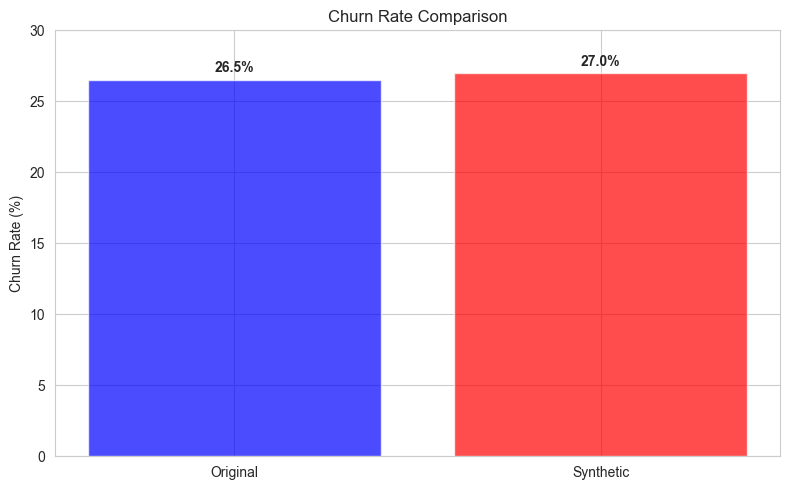

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

x = ['Original', 'Synthetic']
y = [original_churn * 100, synthetic_churn * 100]

ax.bar(x, y, color=['blue', 'red'], alpha=0.7)
ax.set_ylabel('Churn Rate (%)')
ax.set_title('Churn Rate Comparison')
ax.set_ylim(0, 30)

for i, v in enumerate(y):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Test Model on Synthetic Data

In [11]:
import joblib

model = joblib.load('../models/churn_model_latest.pkl')

In [12]:
X_synthetic = synthetic_df.drop(['CustomerID', 'Churn Value'], axis=1)
y_synthetic = synthetic_df['Churn Value']

predictions = model.predict(X_synthetic)
probabilities = model.predict_proba(X_synthetic)[:, 1]

print("Predictions made on synthetic data")
print(f"Average predicted churn probability: {probabilities.mean():.3f}")

Predictions made on synthetic data
Average predicted churn probability: 0.206


In [13]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

roc_auc = roc_auc_score(y_synthetic, probabilities)
accuracy = accuracy_score(y_synthetic, predictions)

print("Model Performance on Synthetic Data:")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_synthetic, predictions))

Model Performance on Synthetic Data:
ROC-AUC: 0.7791
Accuracy: 0.7520

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.85       730
           1       0.59      0.26      0.36       270

    accuracy                           0.75      1000
   macro avg       0.68      0.60      0.60      1000
weighted avg       0.72      0.75      0.72      1000

